In [ ]:
from google.colab import drive

# Mount on Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Change directory to project folder
os.chdir("/content/drive/MyDrive/CS547/DeepDiveProject/Dataset")

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [ ]:
# Load working dataset
working_data = pickle.load(open("working_dataset.pkl", "rb"))
working_data

,Date,Gasoline Prices (Dollars per Gallon),Net Imports (Thousand Barrels per Day)
0,1993-04-05/1993-04-11,1.068,7970
1,1993-04-12/1993-04-18,1.079,6990
2,1993-04-19/1993-04-25,1.079,7729
3,1993-04-26/1993-05-02,1.086,8437
4,1993-05-03/1993-05-09,1.086,7086
...,...,...,...
1641,2024-09-16/2024-09-22,3.307,-2798
1642,2024-09-23/2024-09-29,3.311,-2829
1643,2024-09-30/2024-10-06,3.303,-3015
1644,2024-10-07/2024-10-13,3.260,-3412


## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Convert Date to numeric values (number of days since a fixed date)
working_data['Date_numeric'] = working_data['Date'].dt.start_time.map(lambda x: x.toordinal())

# Define features (X) and target variable (y)
X = working_data[['Date_numeric', 'Net Imports (Thousand Barrels per Day)']]
y = working_data['Gasoline Prices (Dollars per Gallon)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler and fit it to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regress with Raw Data

In [ ]:
# Create a linear regression model and fit it to the raw training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the raw test data
y_pred = model.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Display model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Mean Squared Error: 0.25329557868278724
Mean Absolute Error: 0.4056281146969147
Intercept: -221.38116271373232
Coefficients: [3.04348265e-04 7.73837172e-05]


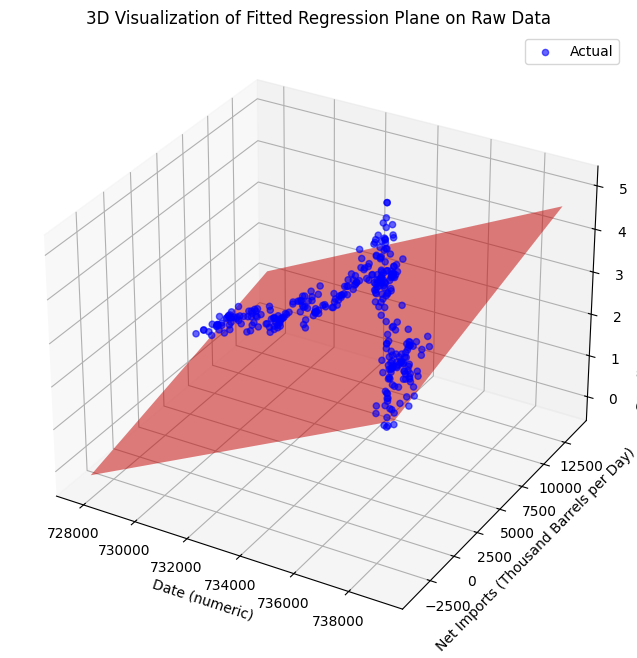

In [ ]:
# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual test data points
ax.scatter(X_test['Date_numeric'], X_test['Net Imports (Thousand Barrels per Day)'], y_test, color='blue', label="Actual", alpha=0.6)

# Generate a mesh grid for Date_numeric and Net Imports
date_range = np.linspace(X_test['Date_numeric'].min(), X_test['Date_numeric'].max(), 10)
net_imports_range = np.linspace(X_test['Net Imports (Thousand Barrels per Day)'].min(), X_test['Net Imports (Thousand Barrels per Day)'].max(), 10)
date_grid, net_imports_grid = np.meshgrid(date_range, net_imports_range)

# Predict gasoline prices on the grid to form the regression plane
X_grid = np.c_[date_grid.ravel(), net_imports_grid.ravel()]
y_grid = model.predict(X_grid).reshape(date_grid.shape)

# Plot the regression plane
ax.plot_surface(date_grid, net_imports_grid, y_grid, color='red', alpha=0.5, rstride=100, cstride=100)

# Labels and title
ax.set_xlabel("Date (numeric)")
ax.set_ylabel("Net Imports (Thousand Barrels per Day)")
ax.set_zlabel("Gasoline Prices (Dollars per Gallon)")
plt.title("3D Visualization of Fitted Regression Plane on Raw Data")
plt.legend()
plt.show()

### Regress with Normalized Data

In [ ]:
# Create a linear regression model and fit it to the scaled training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Display model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Mean Squared Error: 0.2532955786827866
Mean Absolute Error: 0.40562811469691346
Intercept: 2.389756838905758
Coefficients: [1.01598237 0.34567707]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


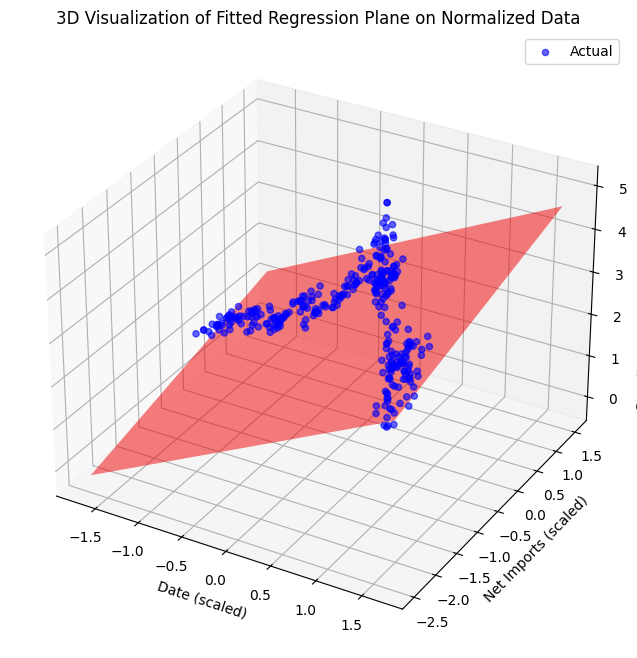

In [ ]:
# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual scaled test data points
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], y_test, color='blue', label="Actual", alpha=0.6)

# Generate a mesh grid for Date_numeric and Net Imports within the scaled range
date_range_scaled = np.linspace(X_test_scaled[:, 0].min(), X_test_scaled[:, 0].max(), 10)
net_imports_range_scaled = np.linspace(X_test_scaled[:, 1].min(), X_test_scaled[:, 1].max(), 10)
date_grid_scaled, net_imports_grid_scaled = np.meshgrid(date_range_scaled, net_imports_range_scaled)

# Predict gasoline prices on the scaled grid to form the regression plane
X_grid_scaled = np.c_[date_grid_scaled.ravel(), net_imports_grid_scaled.ravel()]
y_grid = model.predict(X_grid_scaled).reshape(date_grid_scaled.shape)

# Plot the regression plane
ax.plot_surface(date_grid_scaled, net_imports_grid_scaled, y_grid, color='red', alpha=0.5, rstride=100, cstride=100)

# Labels and title
ax.set_xlabel("Date (scaled)")
ax.set_ylabel("Net Imports (scaled)")
ax.set_zlabel("Gasoline Prices (Dollars per Gallon)")
plt.title("3D Visualization of Fitted Regression Plane on Normalized Data")
plt.legend()
plt.show()

### Discussion

In our study, we use Linear Regression as a benchmark model to predict gasoline prices based on two key features: Date and Net Imports. We compare two versions of the model—one with raw feature values and one with normalized features. We opted not to normalize gasoline prices themselves, as their values are already relatively small, minimizing potential scale issues.

The visualizations reveal that both models yield similar regression planes, despite the scaling differences in the features. However, the data distribution of gasoline prices exhibits a distinctive V-shaped pattern, suggesting a non-linear relationship that Linear Regression, being a linear model, fails to fully capture. This shape could even hint at a parabolic trend, which would require a more flexible model to approximate accurately.

The performance metrics also reflect this limitation, with a Mean Squared Error (MSE) of around 0.2533 and a Mean Absolute Error (MAE) of approximately 0.4056. These results indicate that while Linear Regression provides a useful baseline, a more complex model, potentially one that accounts for quadratic or higher-order terms, may be necessary to capture the underlying curvature in the gasoline price trend.